# **IPL Team performance Evaluation (Mumbai Indians)**

# 1.1 Importing Libraries

In [180]:
# Install category_encoders if not already installed
%pip install category_encoders
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#1.2 Loding The Data Sets

In [181]:
# Load the datasets
#from google.colab import drive
#drive.mount("/content/drive")


In [182]:
#!apt-get install git


In [183]:
#!git clone https://github.com/jalilrohi1/IplWinPredict.git


In [184]:
#%cd IplWinPredict

In [271]:
#path_matchDataSet ='/content/drive/MyDrive/Colab Notebooks/iplDataSet/matches.csv'
#path_deliveryDataSet='/content/drive/MyDrive/Colab Notebooks/iplDataSet/deliveries.csv'
path_matchDataSet = 'data/matches.csv'
path_matchDataSet1 = 'data/matches1.csv'
path_deliveryDataSet='data/deliveries.csv'
path_deliveryDataSet1='data/deliveries1.csv'
ipl_matches = pd.read_csv(path_matchDataSet)
ipl_delivery =pd.read_csv(path_deliveryDataSet)
ipl_matches1 = pd.read_csv(path_matchDataSet1)
ipl_delivery1 =pd.read_csv(path_deliveryDataSet1)

In [267]:
ipl_delivery

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,player_dismissed,dismissal_kind,fielder,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,0.0,DA Warner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,1370353,2,Chennai Super Kings,Gujarat Titans,14,2,S Dube,MM Sharma,RA Jadeja,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243813,1370353,2,Chennai Super Kings,Gujarat Titans,14,3,RA Jadeja,MM Sharma,S Dube,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243814,1370353,2,Chennai Super Kings,Gujarat Titans,14,4,S Dube,MM Sharma,RA Jadeja,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243815,1370353,2,Chennai Super Kings,Gujarat Titans,14,5,RA Jadeja,MM Sharma,S Dube,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
#to Save Data Back in the Drive
#ipl_matches.to_csv(path_matchDataSet, index=False)
#ipl_delivery.to_csv(path_deliveryDataSet, index=False)

# **2 Exploring and Analyzing the DataSet**

In [188]:
# Display the first few rows of each dataset to understand their structure
ipl_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [189]:
ipl_delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,player_dismissed,dismissal_kind,fielder,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,0.0,DA Warner


In [190]:
ipl_matches.shape

(1024, 20)

In [191]:
ipl_delivery.shape

(243817, 24)

In [192]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1024 non-null   int64  
 1   season           1024 non-null   object 
 2   city             973 non-null    object 
 3   date             1024 non-null   object 
 4   match_type       1024 non-null   object 
 5   player_of_match  1019 non-null   object 
 6   venue            1024 non-null   object 
 7   team1            1024 non-null   object 
 8   team2            1024 non-null   object 
 9   toss_winner      1024 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  winner           1019 non-null   object 
 12  result           1024 non-null   object 
 13  result_margin    1005 non-null   float64
 14  target_runs      1021 non-null   float64
 15  target_overs     1021 non-null   float64
 16  super_over       1024 non-null   object 
 17  method        

**Things observed from Match info.**

**Date column** - wrong Datatype. it should be Datetime but it is object

**Season Column** - Wrong Datatype and error in values. it should be int / categorical but it is object.

Additional points that can be done on the dataframe
The Following columns are in object format but it can be converted to Categorical.

**1.City 2.Season 3.Team1 4.Team2 5.Toss_Winner 6Toss_Decision 7.Winner 8.Result 9.Venue**

In [193]:
ipl_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          243817 non-null  int64  
 1   inning            243817 non-null  int64  
 2   batting_team      243817 non-null  object 
 3   bowling_team      243817 non-null  object 
 4   over              243817 non-null  int64  
 5   ball              243817 non-null  int64  
 6   batter            243817 non-null  object 
 7   bowler            243817 non-null  object 
 8   non_striker       243817 non-null  object 
 9   batsman_runs      243817 non-null  int64  
 10  extra_runs        243817 non-null  int64  
 11  total_runs        243817 non-null  int64  
 12  extras_type       13059 non-null   object 
 13  is_wicket         243817 non-null  int64  
 14  player_dismissed  12067 non-null   object 
 15  dismissal_kind    12067 non-null   object 
 16  fielder           86


**Things observed from the deliveries.**
All the columns appear to be in correct Datatype format.
Additional Things that can be done on dataframe Following is the list of column in int64 / object. we can convert them into Categorical columns

**1.Innings 2.Over 3.Ball 4.batsman_runs 5.Extras_type 6.is_wicket 7.dismissal_kind**


# **2.5 Data Visualization**

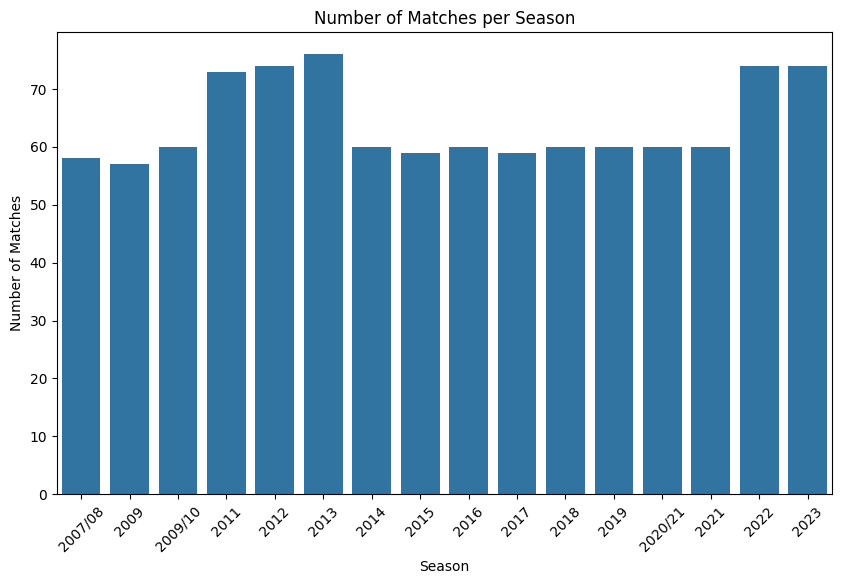

In [194]:
# Number of Matches per Season
plt.figure(figsize=(10, 6))
sns.countplot(data=ipl_matches, x='season')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


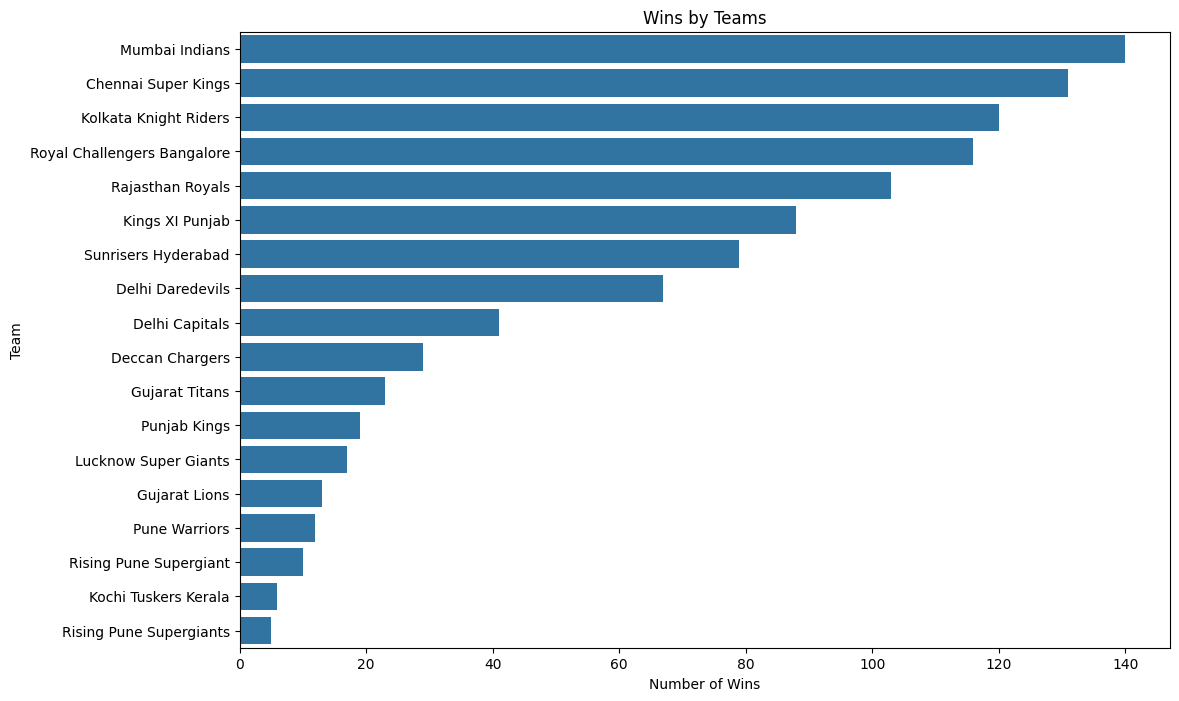

In [195]:
# Wins by Teams
plt.figure(figsize=(12, 8))
sns.countplot(data=ipl_matches, y='winner', order=ipl_matches['winner'].value_counts().index)
plt.title('Wins by Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_21824\2396053095.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')


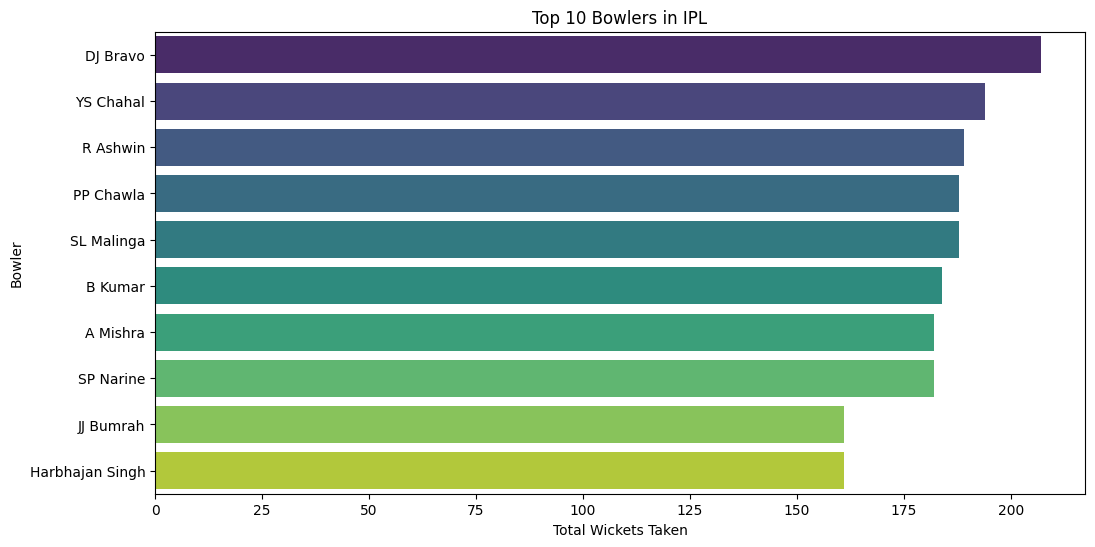

In [196]:
# Filter data for deliveries that resulted in a wicket
# Check if 'dismissal_kind' column exists and filter based on non-null values
wickets = ipl_delivery[ipl_delivery['dismissal_kind'].notna()]

# Calculate total wickets taken by each bowler
bowler_wickets = wickets.groupby('bowler').size().reset_index(name='wickets')
bowler_wickets = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)

# Plot top 10 bowlers
plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=bowler_wickets, palette='viridis')
plt.title('Top 10 Bowlers in IPL')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.show()

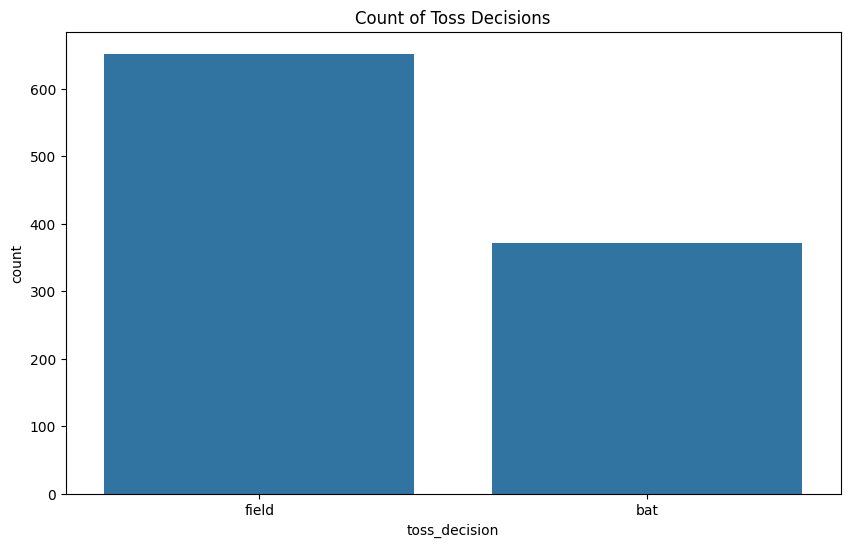

In [197]:
# Bar chart for toss decisions
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_decision', data=ipl_matches)
plt.title('Count of Toss Decisions')
plt.show()

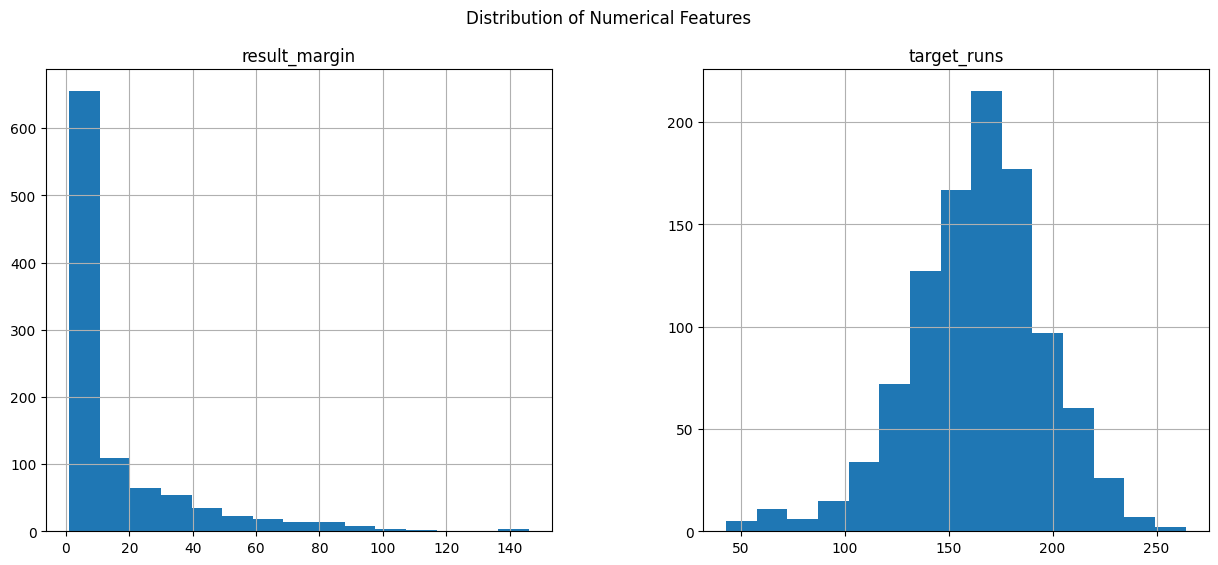

In [198]:
# Plotting histograms for numerical features
numerical_features = ['result_margin', 'target_runs']
ipl_matches[numerical_features].hist(bins=15, figsize=(15, 6), layout=(1, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

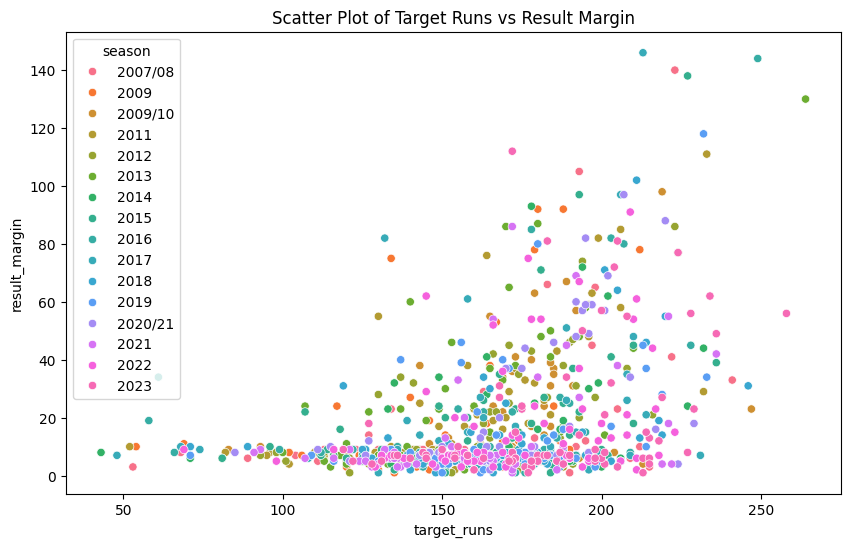

In [199]:
# Scatter plot to explore the relationship between result_margin and target_runs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ipl_matches, x='target_runs', y='result_margin', hue='season')
plt.title('Scatter Plot of Target Runs vs Result Margin')
plt.show()

<Axes: xlabel='over'>

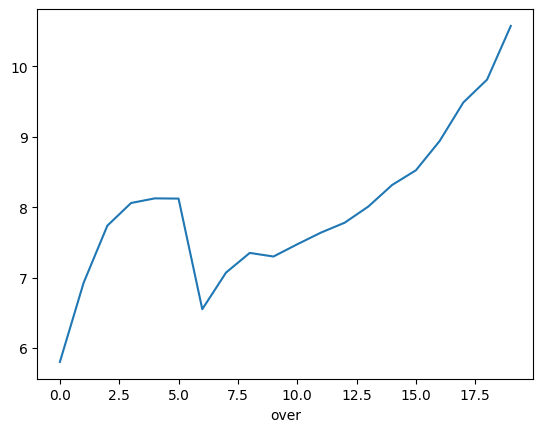

In [200]:
# Average runs in an over (All seasons combined)
(ipl_delivery.groupby('over')['total_runs'].mean()*6).plot(kind = 'line')

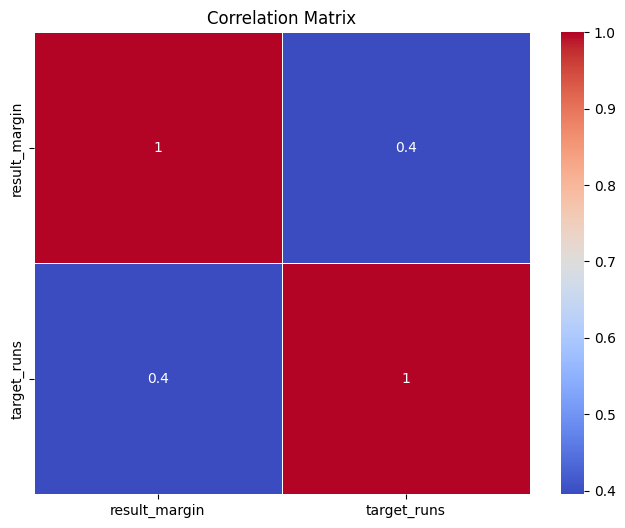

In [201]:
# Compute the correlation matrix
correlation_matrix = ipl_matches[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


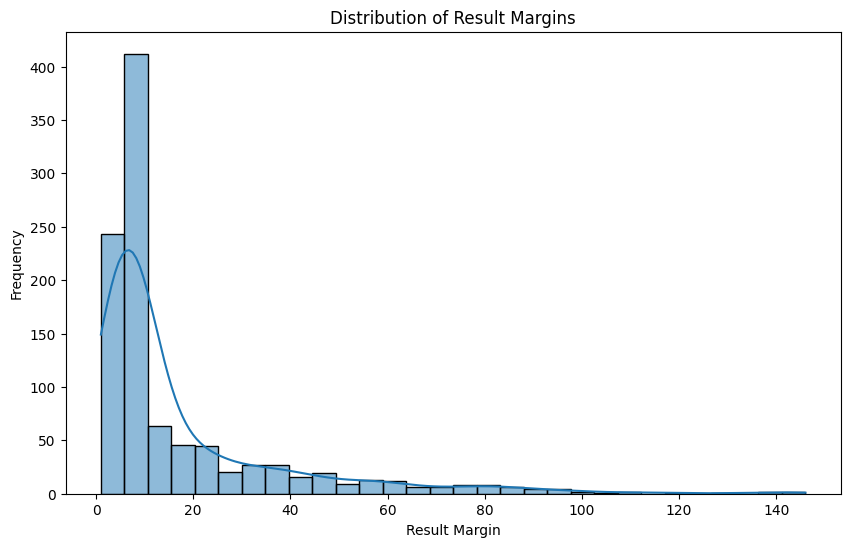

In [202]:
# Distribution of Result Margins
plt.figure(figsize=(10, 6))
sns.histplot(data=ipl_matches, x='result_margin', bins=30, kde=True)
plt.title('Distribution of Result Margins')
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.show()

**Reasoning:**

**1.Random Forest for Classification:** Random Forest is a robust model for classification tasks and works well with categorical features.

**2.Random Forest for Regression:** Similarly, Random Forest is effective for regression tasks and handles non-linear relationships well.

These models should give you a good starting point. You can further tune the hyperparameters, try other algorithms, and perform cross-validation to improve performance.

# **2.1 Data Cleaning**



# **2.1.1 Checking for null values**


In [203]:
#Exporting the Data to clipboard then to excel
#ipl_matches.to_clipboard(index=False)
#ipl_delivery.to_clipboard(index=False)

### **2.1.1.1 Handling Missing Values (Match Dataset)**

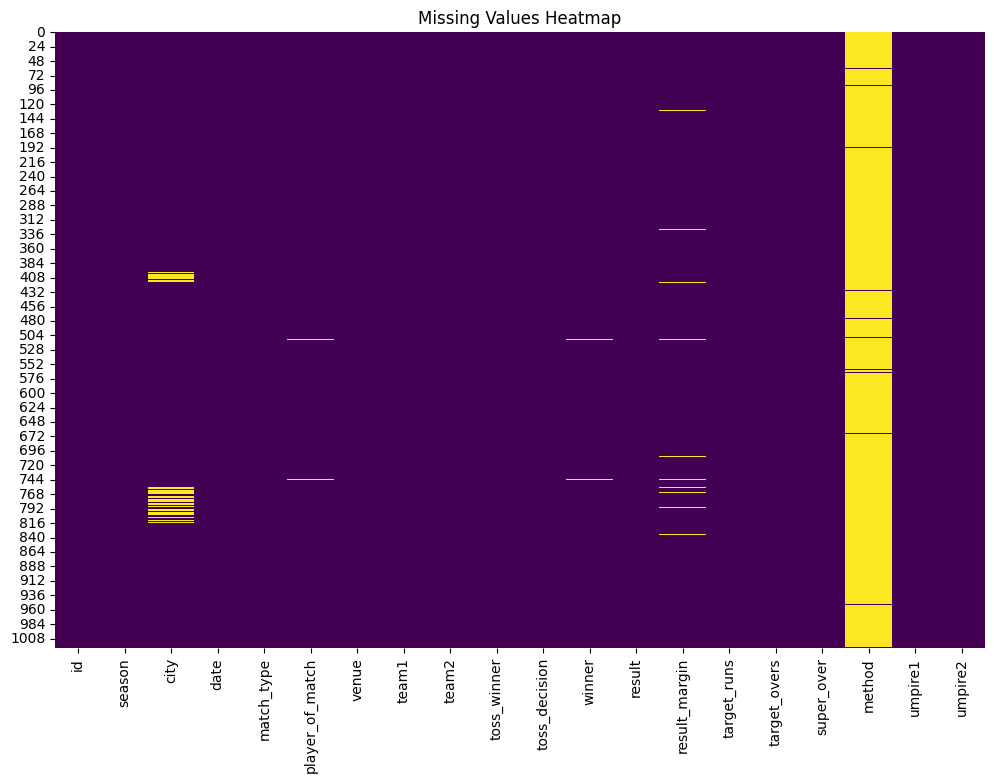

In [204]:
# Assuming data is your IPL DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_matches.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [205]:
ipl_matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1003
umpire1               0
umpire2               0
dtype: int64

**city:** This column has **51** missing values. We can fill these missing values with 'Unknown' but I decided to analyze the data in excel aftwer looking at data I found That The city where we have nan values, then staiums are Dubai International Cricket Stadium - Dubai
Sharjah Cricket Stadium - Sharjahso we will fill it whit respect to the **venue.**

**player_of_match**, **winner:** These columns have **5** missing values each. These can be left as is or filled with 'Unknown' for simplicity, but after analysis the data I found that if there is no winner then the match doesn't played between the teams and no player of the match exits, so **I decided to delete these five rows.**

**result_margin:** This column has **19** missing values. Since result margin is important, after analysis I found that the match has **Tied** between the teams, **So we can fill missing values with 0.**

**target_runs**, **target_overs:** These columns have **3** missing values each. It might be due to incomplete matches or no results. **Fill these with 0.** but when** I delete the Plyer of the match the it will be deleted because these** are related with them

**method:** This column has **1003** missing values. Since this is not relevant for most analyses, **we can drop this column.**

In [206]:
#Replacing the City with respect to the Venue
for index, row in ipl_matches.iterrows():
  if row['venue'] == 'Dubai International Cricket Stadium':
    ipl_matches.at[index, 'city'] = 'Dubai'
  elif row['venue'] == 'Sharjah Cricket Stadium':
    ipl_matches.at[index,'city'] = 'Sharjah'

In [207]:
#Drop rows with null 'winner', player of the match and target runs and target overs
ipl_matches = ipl_matches.dropna(subset=['winner'])

In [208]:
ipl_matches['result_margin'] = ipl_matches['result_margin'].fillna(0)


In [209]:
# Filter out matches where D/L method was applied
ipl_matches = ipl_matches[ipl_matches['method'] != 'D/L']
#filling the method with 0
ipl_matches['method'] = ipl_matches['method'].fillna(0)
# Now you can work with the filtered DataFrame 'filtered_matches'
(ipl_matches.head())

C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_21824\425810852.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ipl_matches['method'] = ipl_matches['method'].fillna(0)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,0,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,0,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,0,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,0,BF Bowden,K Hariharan


In [210]:
# Drop 'method' column as it has too many missing values
#ipl_matches.drop(columns=['method'], inplace=True)


In [211]:
ipl_matches[ipl_matches['target_overs'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [212]:
ipl_matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

### **2.1.1.2 Handling Missing Values (Delivery Dataset)**

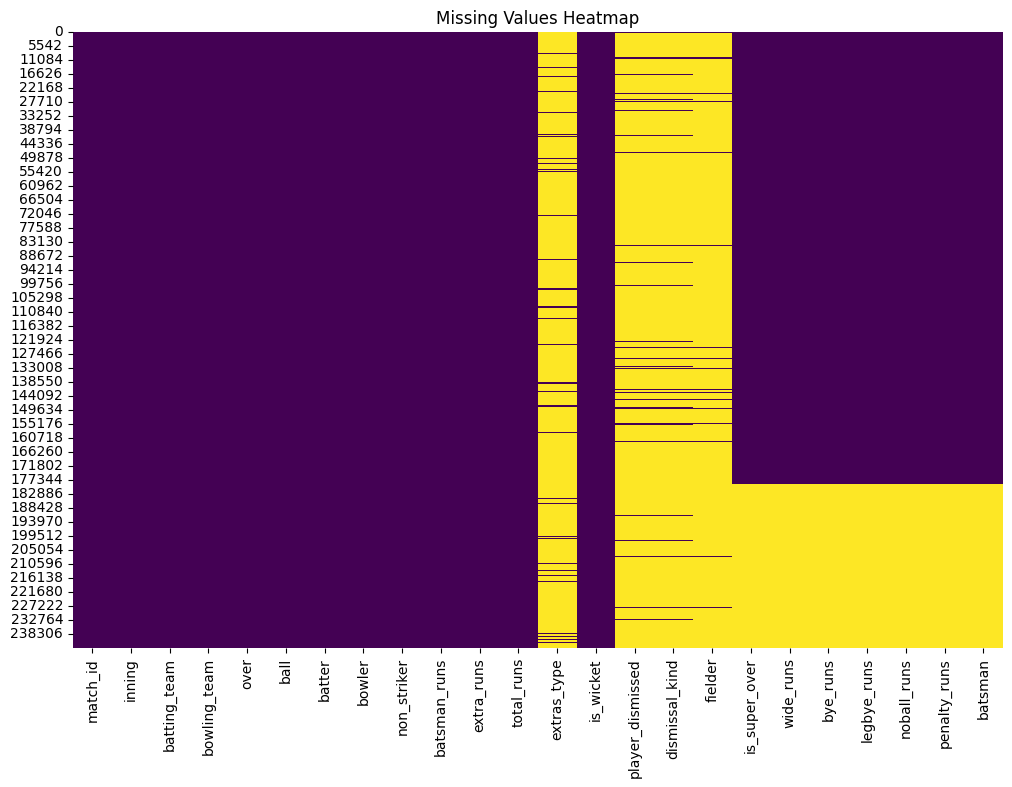

In [213]:
#data is  IPL Deliveries
plt.figure(figsize=(12, 8))
sns.heatmap(ipl_delivery.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [214]:
ipl_delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         230758
is_wicket                0
player_dismissed    231750
dismissal_kind      231750
fielder             235154
is_super_over        64739
wide_runs            64739
bye_runs             64739
legbye_runs          64739
noball_runs          64739
penalty_runs         64739
batsman              64739
dtype: int64


**extras_type, player_dismissed, dismissal_kind, fielder:** These columns have many missing values because they are relevant only when specific events occur. We can fill these with **'None'**.

In [215]:
# extra_type
ipl_delivery['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [216]:
# Fill 'extras_type', 'player_dismissed', 'dismissal_kind', and 'fielder' with 'None' where they are missing
ipl_delivery['extras_type'] = ipl_delivery['extras_type'].fillna('None')
ipl_delivery['fielder'] = ipl_delivery['fielder'].fillna('None')

# Verify the changes
ipl_delivery.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type              0
is_wicket                0
player_dismissed    231750
dismissal_kind      231750
fielder                  0
is_super_over        64739
wide_runs            64739
bye_runs             64739
legbye_runs          64739
noball_runs          64739
penalty_runs         64739
batsman              64739
dtype: int64

In [217]:
# First, fill the missing values with a placeholder string
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].fillna("unknown")


In [218]:
# Then, convert the entire column to string type
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].astype(str)

In [219]:
# Now, replace the placeholder with "0" and create the binary feature
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].replace("unknown", "0")

In [220]:
#Now we should Convert them to zero, and one
ipl_delivery['player_dismissed'] = ipl_delivery['player_dismissed'].apply(lambda x: 1 if x != "0" else 0)

## **2.2 Handeling Duplicates and Searching for anomalies in data**

### **2.2.1 Matche data Set**

In [221]:
ipl_matches.duplicated().sum()

0

In [222]:
ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [223]:
ipl_matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [224]:
ipl_matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

There is a team repreated Twice.

Rising Pune Supergiants - Rising Pune Supergiant
Teams name has been replaced

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [225]:
# Changing the Names.
team_names = {'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings'}


In [226]:
ipl_matches['team1'] = ipl_matches['team1'].replace(team_names)

ipl_matches['team2'] = ipl_matches['team2'].replace(team_names)

In [227]:
ipl_matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers', 'Punjab Kings',
       'Delhi Capitals', 'Mumbai Indians', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [228]:
ipl_matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

**The Following values are Duplicate**

Wankhede Stadium - Wankhede Stadium, Mumbai

Brabourne Stadium - Brabourne Stadium, Mumbai

Eden Gardens - Eden Gardens, Kolkata

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Punjab Cricket Association IS Bindra Stadium - Punjab Cricket Association IS Bindra Stadium, Mohali

Maharashtra Cricket Association Stadium - Maharashtra Cricket Association Stadium, Pune

Rajiv Gandhi International Stadium - Rajiv Gandhi International Stadium, Uppal

Dr DY Patil Sports Academy - Dr DY Patil Sports Academy, Mumbai

MA Chidambaram Stadium - MA Chidambaram Stadium, Chepauk -MA Chidambaram Stadium, Chepauk, Chennail

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Zayed Cricket Stadium, Abu Dhabi - Sheikh Zayed Stadium

In [229]:
venue_dict = {'Wankhede Stadium, Mumbai':'Wankhede Stadium','Brabourne Stadium, Mumbai':'Brabourne Stadium',
              'Eden Gardens, Kolkata':'Eden Gardens','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium',
              'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium',
              'Maharashtra Cricket Association Stadium, Pune':'Maharashtra Cricket Association Stadium',
              'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium','Dr DY Patil Sports Academy, Mumbai':
              'Dr DY Patil Sports Academy','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium','Zayed Cricket Stadium, Abu Dhabi':
              'Sheikh Zayed Stadium','MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk, Chennail':
              'MA Chidambaram Stadium','Narendra Modi Stadium, Ahmedabad':'Narendra Modi Stadium'}

ipl_matches['venue'] = ipl_matches['venue'].replace(venue_dict)

In [230]:
ipl_matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

**There is a team repreated Twice.**

Rising Pune Supergiants - Rising Pune Supergiant

**Teams name has been replaced**

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [231]:
ipl_matches['toss_winner'] = ipl_matches['toss_winner'].replace(team_names)

In [232]:
ipl_matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

**There is a team repreated Twice.** Rising Pune Supergiants - Rising Pune Supergiant

**Teams name has been replaced**

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [233]:
ipl_matches['winner'] = ipl_matches['winner'].replace(team_names)

In [234]:
ipl_delivery.duplicated().sum()

0

**Resolving the Error in data 2009/02 to 2009**

In [235]:
# Remove '/' and digits after '/' in 'season' column
ipl_matches['season'] = ipl_matches['season'].apply(lambda x: x.split('/')[0] if '/' in x else x)

# Print the result
ipl_matches['season'].unique()

array(['2007', '2009', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

# **2.3 Data Transfermation**

## **Matches Data Set**

date: Should be converted **from object to datetime**.

**The following Should be converted from object to categorical:**

season, match_type, player_of_match, venue, team1, team2, toss_winner, toss_decision, winner, result, super_over, umpire1, umpire2


In [236]:
# Convert 'date' to datetime
ipl_matches['date'] = pd.to_datetime(ipl_matches['date'])

# Convert columns to categorical type
categorical_columns_matches = ['season','city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'super_over', 'umpire1', 'umpire2']
ipl_matches[categorical_columns_matches] = ipl_matches[categorical_columns_matches].astype('category')

# Verify the changes
print(ipl_matches.info())

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1022
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               998 non-null    int64         
 1   season           998 non-null    category      
 2   city             998 non-null    category      
 3   date             998 non-null    datetime64[ns]
 4   match_type       998 non-null    category      
 5   player_of_match  998 non-null    category      
 6   venue            998 non-null    category      
 7   team1            998 non-null    category      
 8   team2            998 non-null    category      
 9   toss_winner      998 non-null    category      
 10  toss_decision    998 non-null    category      
 11  winner           998 non-null    category      
 12  result           998 non-null    category      
 13  result_margin    998 non-null    float64       
 14  target_runs      998 non-null    float64      

## **Delivery Data Set**

**The following Should be converted from object to categorical:**

extras_type, player_dismissed, dismissal_kind, fielder

In [237]:
# Convert columns in df_ipl_delivery to categorical type
categorical_columns_delivery = ['batting_team','bowling_team', 'player_dismissed', 'dismissal_kind', 'fielder']
ipl_delivery[categorical_columns_delivery] = ipl_delivery[categorical_columns_delivery].astype('category')

# Verify the changes
print(ipl_delivery.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   match_id          243817 non-null  int64   
 1   inning            243817 non-null  int64   
 2   batting_team      243817 non-null  category
 3   bowling_team      243817 non-null  category
 4   over              243817 non-null  int64   
 5   ball              243817 non-null  int64   
 6   batter            243817 non-null  object  
 7   bowler            243817 non-null  object  
 8   non_striker       243817 non-null  object  
 9   batsman_runs      243817 non-null  int64   
 10  extra_runs        243817 non-null  int64   
 11  total_runs        243817 non-null  int64   
 12  extras_type       243817 non-null  object  
 13  is_wicket         243817 non-null  int64   
 14  player_dismissed  243817 non-null  category
 15  dismissal_kind    12067 non-null   category
 16  fi

# **2.5 Feature Engineering**

In [238]:
# Convert total_runs to numeric if it is not already
#if ipl_delivery['total_runs'].dtype == 'category':
ipl_delivery['total_runs'] = pd.to_numeric(ipl_delivery['total_runs'])

In [239]:
# Convert total_runs to numeric, overwriting if it was category type
ipl_delivery['total_runs'] = pd.to_numeric(ipl_delivery['total_runs'], errors='coerce')

#Creating  a total Runs Feature
total_score_df = ipl_delivery.groupby(['match_id','inning'])['total_runs'].sum().reset_index() # Removed .sum() from the groupby object

#We Need Only the First Inning Total Runs
total_score_df = total_score_df[total_score_df['inning'] == 1]
match_df= ipl_matches
#Merging the Total Run Feature to The Data Set
match_df = ipl_matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [240]:
# we should pickup those fields which are required for predection and Merge it with the Delivery Data Set
match_df = match_df[['match_id','city','winner','total_runs']]

## Merging the Data Sets

In [243]:
#Merge both Data sets
delivery_df = match_df.merge(ipl_delivery,on='match_id')

In [244]:
#we Need only Second Innings Data
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [245]:
delivery_df.dtypes

match_id               int64
city                category
winner              category
total_runs_x           int64
inning                 int64
batting_team        category
bowling_team        category
over                   int64
ball                   int64
batter                object
bowler                object
non_striker           object
batsman_runs           int64
extra_runs             int64
total_runs_y           int64
extras_type           object
is_wicket              int64
player_dismissed    category
dismissal_kind      category
fielder             category
is_super_over        float64
wide_runs            float64
bye_runs             float64
legbye_runs          float64
noball_runs          float64
penalty_runs         float64
batsman               object
dtype: object

In [246]:
delivery_df.total_runs_y.isnull().sum()

0

In [247]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,BCJ Cutting
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,CH Gayle
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,Mandeep Singh
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,Mandeep Singh
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,None,0.0,0.0,0.0,0.0,0.0,0.0,Mandeep Singh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239676,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,4,JP Behrendorff,...,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239677,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,5,K Kartikeya,...,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239678,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,17,6,K Kartikeya,...,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239679,1370352,Ahmedabad,Gujarat Titans,233,2,Mumbai Indians,Gujarat Titans,18,1,JP Behrendorff,...,0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
delivery_df['total_runs_y'].fillna(0, inplace=True)


C:\Users\LAPTOP-5\AppData\Local\Temp\ipykernel_21824\1018674920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delivery_df['total_runs_y'].fillna(0, inplace=True)


In [249]:
# Convert 'total_runs_y' to a numeric type before calculating the cumulative sum
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].astype(int)  # or float, depending on your data

# Now calculate the current score
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [250]:
#Remaining Runs
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [251]:
#Remaining Balls
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [252]:
delivery_df['player_dismissed'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [253]:
#Wickets On hand
# Convert to numeric type before calculating cumulative sum
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')  # Ensure 'player_dismissed' is numeric

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wicketsOnHand'] = 10 - wickets

In [254]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [255]:
#Required Run Rate
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [256]:
#function for converting of result to 0 and 1
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [257]:
#Coverting the data of result to 0 and 1
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [258]:
#Feature Selection for the final model
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wicketsOnHand','total_runs_x','crr','rrr','result']]

In [259]:
final_df = final_df.sample(final_df.shape[0])

In [260]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wicketsOnHand,total_runs_x,crr,rrr,result
151030,Sunrisers Hyderabad,Kings XI Punjab,Chandigarh,103,51,7,193,7.826087,12.117647,0


In [261]:
final_df.dropna(inplace=True)

In [262]:
final_df = final_df[final_df['balls_left'] != 0]

In [263]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116116 entries, 84564 to 144987
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   batting_team   116116 non-null  category
 1   bowling_team   116116 non-null  category
 2   city           116116 non-null  category
 3   runs_left      116116 non-null  int64   
 4   balls_left     116116 non-null  int64   
 5   wicketsOnHand  116116 non-null  int32   
 6   total_runs_x   116116 non-null  int64   
 7   crr            116116 non-null  float64 
 8   rrr            116116 non-null  float64 
 9   result         116116 non-null  int64   
dtypes: category(3), float64(2), int32(1), int64(4)
memory usage: 7.0 MB


# **Model Selection & Evaluation**

## **Step 1: Prepare Your Data**

First, let's extract the features and target variable from your final_df DataFrame. You mentioned you want to use batting_team, bowling_team, and city to predict the winner.

In [264]:
# ... (Your existing code for defining categorical_features, numerical_features, and transformer)

# Select features (excluding 'result' or 'winner')
features = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wicketsOnHand', 'total_runs_x', 'crr', 'rrr']
X = final_df[features]

## **Step 2: Handle Categorical Features**
Since our features are categorical, we need to encode them numerically for the machine learning models to understand. We can use one-hot encoding for this:

In [265]:
# Separate categorical and numerical features
categorical_features = ['batting_team', 'bowling_team', 'city']
numerical_features = ['runs_left', 'balls_left', 'wicketsOnHand', 'total_runs_x', 'crr', 'rrr']


# Create the ColumnTransformer
transformer = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('onehot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'),
     categorical_features)
], remainder='passthrough')

# Separate numerical and categorical features
X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

# Replace infinite values with a large finite number or NaN and then fill NaNs in numerical features only
X_numerical_replaced = X_numerical.replace([np.inf, -np.inf], np.nan).fillna(X_numerical.replace([np.inf, -np.inf], np.nan).max())

# Recombine numerical and categorical features
X_replaced = pd.concat([X_numerical_replaced, X_categorical], axis=1)

# Apply the transformer
X_encoded = transformer.fit_transform(X_replaced)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# Handle potential infinite/large values
X_encoded = np.nan_to_num(X_encoded, posinf=np.nan, neginf=np.nan)
X_encoded = pd.DataFrame(X_encoded).fillna(method='ffill').values

# Extract target variable ('winner')
y = final_df['winner']  =final_df['result']

## **Step 3: Using F1-Score with Cross-Validation**


Since we want to predict the winner, we are dealing with a classification problem. For classification problems, common metrics to consider are:

1. Accuracy: The overall percentage of correct predictions. This is a good starting point, but can be misleading if you have imbalanced classes (one team wins much more often).

2. Precision: Focuses on how many of the positive predictions made were actually correct. Useful if you want to minimize false positives (predicting a team wins when they don't).

3. Recall: Focuses on how many of the actual positive instances were correctly predicted. Useful if you want to minimize false negatives (predicting a team loses when they actually win).

4. F1-Score: A balanced metric that combines precision and recall. A good choice if you want to find a balance between minimizing both false positives and false negatives.

Which to choose?

Since we don't have a specific preference yet, we start with accuracy and F1-score to get a general idea of model performance. Later, if we find that minimizing one type of error (false positives or false negatives) is more important, we can focus on precision or recall accordingly

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='f1_macro')
print("F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F1-Score: 1.00 (+/- 0.00)


## **Step 3: Split Data into Training and Testing Sets**

Let's split the data into training and testing sets to evaluate our model's performance on unseen data.

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## **Step 6: Train a Random Forest Model**

let's try a more complex model that often performs well on classification tasks: Random Forest.

In [ ]:
# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)

## **Step 7: Evaluate the Random Forest Model**

Let's see how the Random Forest performs on the test set:

In [ ]:
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')# Use 'macro' for balanced classes

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest F1-Score:", f1_rf)

Random Forest Accuracy: 0.998794350671719
Random Forest F1-Score: 0.9987759426253751


## **Step 4: Train a Simple Model (Logistic Regression)**
Let's start with a simple and interpretable model: Logistic Regression.

In [ ]:
# 2. Logistic Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#lr_model = LogisticRegression(max_iter=5000)
lr_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=5000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

## **Step 5: Evaluate the Model**
Now, let's evaluate the model's performance on the test set using accuracy and F1-score:

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')  # 'macro' averages F1-score across all classes
print("\nLogistic Regression:")
print("Accuracy:", accuracy_lr)
print("F1-Score:", f1_lr)


Logistic Regression:
Accuracy: 0.8517481915260076
F1-Score: 0.84988841284042


## **Step 8: Train a Decision Tree Model**

In [ ]:
# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Step 9: Evaluate the Decision Tree Model**

Let's see how the Decision Tree performs on the test set:

In [ ]:
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print("\nDecision Tree:")
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree F1-Score:", f1_dt)


Decision Tree:
Decision Tree Accuracy: 0.994014812263176
Decision Tree F1-Score: 0.9939238849389269


## **Cross-validation for more robust evaluation**

In [ ]:

# --- Further Analysis ---

# Cross-validation for more robust evaluation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='f1_macro')
print("\nRandom Forest Cross-Validation F1-Score: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std() * 2))

lr_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='f1_macro')
print("Logistic Regression Cross-Validation F1-Score: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

dt_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='f1_macro')
print("Decision Tree Cross-Validation F1-Score: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))



Random Forest Cross-Validation F1-Score: 1.00 (+/- 0.00)
Logistic Regression Cross-Validation F1-Score: 0.85 (+/- 0.01)
Decision Tree Cross-Validation F1-Score: 0.99 (+/- 0.00)


## **Feature Importance**

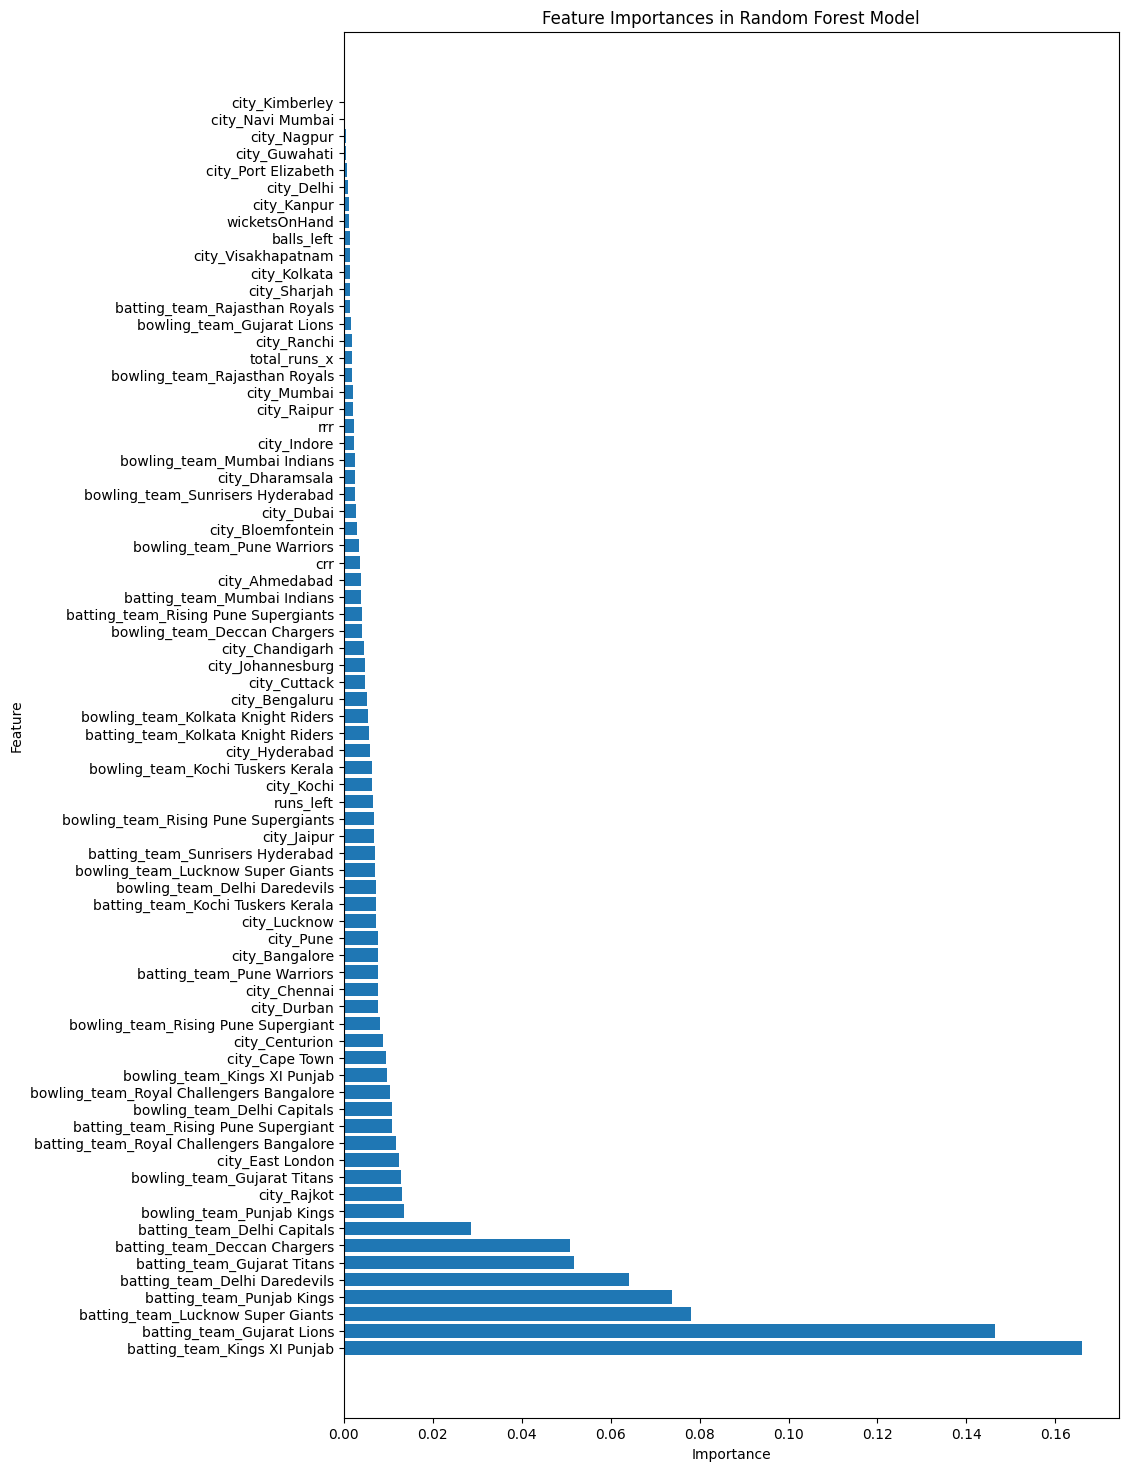

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Assuming the one-hot encoded features are included in the importances,
# you need to adjust the 'Feature' list accordingly.
# Here's a way to do it dynamically:

# Get the feature names after one-hot encoding
feature_names = transformer.named_transformers_['onehot'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([feature_names, numerical_features])

# Create a DataFrame for easier visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,  # Use the dynamically generated feature names
    'Importance': importances
})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# ... (Rest of your plotting code)

# Plot the feature importances
plt.figure(figsize=(10, 18))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()

## **Analyzing Feature Importances**

Assuming you still have your best_rf_model and transformer objects from the previous steps, run the following code:

In [ ]:
# Get feature importances from the best model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': transformer.get_feature_names_out(),
    'Importance': importances
})

# Sort by importance and display
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

                                  Feature  Importance
5                                num__rrr    0.165964
3                       num__total_runs_x    0.146436
8   onehot__batting_team_Delhi Daredevils    0.078144
11   onehot__batting_team_Kings XI Punjab    0.073739
2                      num__wicketsOnHand    0.064203
..                                    ...         ...
61                     onehot__city_Kochi    0.000833
48                   onehot__city_Cuttack    0.000529
59                    onehot__city_Kanpur    0.000428
60                 onehot__city_Kimberley    0.000240
54                  onehot__city_Guwahati    0.000239

[74 rows x 2 columns]


## **1. Generate Confusion Matrices**

Assuming you have your trained models and test data (X_test and y_test), use the following code for each model (replace model with the appropriate model object):

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'best_rf_model' from your previous code is the model you want to use
model = rf_model

# Predict on the test data
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[13022    17]
 [   11 10174]]


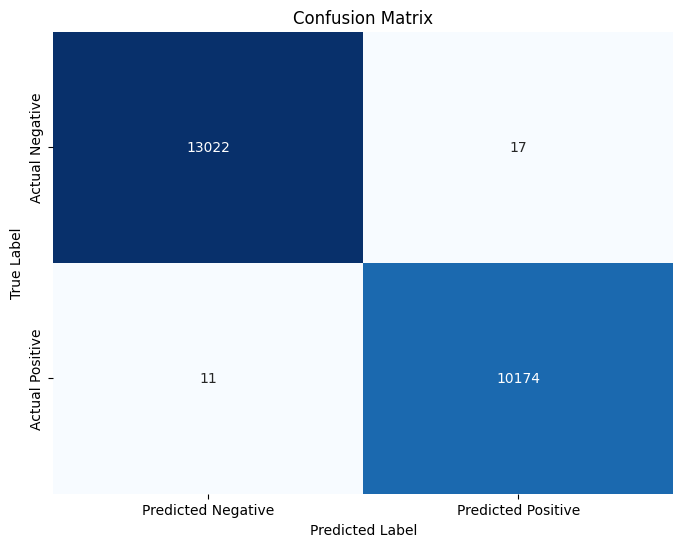

In [ ]:
# Assuming you still have 'y_test' and 'y_pred' from your previous code
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Model Comparison**

In [ ]:


# Replace these with the actual scores you obtained for each model
logistic_regression_accuracy = accuracy_lr # Example value, replace with your actual score
logistic_regression_f1 = f1_lr  # Example value, replace with your actual score

decision_tree_accuracy = accuracy_dt # Example value, replace with your actual score
decision_tree_f1 = f1_dt # Example value, replace with your actual score

random_forest_accuracy = accuracy_rf  # From your tuned Random Forest
random_forest_f1 = f1_rf  # From your tuned Random Forest

# Create a dictionary with the model names and scores
data = {'Model': ['Logistic Regression', 'Decision Tree', 'Tuned Random Forest'],
        'Accuracy': [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy],
        'F1-Score': [logistic_regression_f1, decision_tree_f1, random_forest_f1]}

# Create a pandas DataFrame from the dictionary
comparison_table = pd.DataFrame(data)

# Print the comparison table
print(comparison_table)

                 Model  Accuracy  F1-Score
0  Logistic Regression  0.851748  0.849888
1        Decision Tree  0.994015  0.993924
2  Tuned Random Forest  0.998794  0.998776


# **Prediction**

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wicketsOnHand,total_runs_x,crr,rrr,result,winner
183131,Kings XI Punjab,Royal Challengers Bangalore,Sharjah,1,10,9,171,9.272727,0.6,0,0


In [ ]:
from sklearn.pipeline import Pipeline

# Assuming 'best_rf_model' is your trained Random Forest model
trained_model_step = ('classifier', rf_model)

# Create a simple pipeline with just the trained model
pipe = Pipeline([
    trained_model_step
])

# Now you can use this pipeline for predictions
predictions = pipe.predict(X_test)

In [ ]:
print(predictions)

[1 0 1 ... 1 0 1]


In [ ]:
pipe.predict_proba(X_test)[10]

array([0.9928059, 0.0071941])

## Functions

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [ ]:
from sklearn.impute import SimpleImputer
# Assuming 'final_df' is your DataFrame
features = ['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
            'wicketsOnHand', 'total_runs_x', 'crr', 'rrr']
target = 'winner'  # Assuming 'winner' is your target variable

X = final_df[features]
y = final_df[target]

# Replace infinite values with a large finite number or NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace with NaN

# Separate categorical and numerical features
categorical_features = ['batting_team', 'bowling_team', 'city']
numerical_features = ['runs_left', 'balls_left', 'wicketsOnHand', 'total_runs_x', 'crr', 'rrr']

# Create the ColumnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'),
     categorical_features)
], remainder='passthrough')


# Create the pipeline
from sklearn.preprocessing import RobustScaler
pipelinePred = Pipeline([
       ('transformer', transformer),
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', RobustScaler()),  # Add RobustScaler
       ('classifier', LogisticRegression())
   ])
pipelinePred.fit(X, y)

<ipython-input-632-41dbd9fad385>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace with NaN
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('imputer', SimpleImputer()), ('scaler', RobustScaler()),
                ('classifier', LogisticRegression())])

In [ ]:
def match_progression(pipe):
    match_id = 335982
    match = delivery_df[delivery_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wicketsOnHand','total_runs_x','crr','rrr']].dropna()
    temp_df[0, 7] = np.finfo(np.float32).max
    temp_df = temp_df[temp_df['balls_left'] != 0]
    temp_df['crr'].fillna(0, inplace=True)
    temp_df['rrr'].fillna(0, inplace=True)
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wicketsOnHand'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [ ]:
temp_df,target = match_progression(pipelinePred)
temp_df

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

# 1. **Hyperparameter Tuning with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           n_jobs=-1)  # Use all available cores for faster computation

# Fit the grid search to your training data (assuming you have X_train and y_train)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on your test data
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='macro')
print("Best Model Accuracy:", accuracy_best)
print("Best Model F1-Score:", f1_best)